# <font color=navy> Lecture 6. 단순 회귀분석(Simple Linear Regression) </font>

### Example: Advertisement
- Advertising data는 200개의 다른 시장에서 제품의 sales(단위: 1천 유닛)와 각 시장별로 그 제품에 대한 광고예산(단위: 1천 달러)으로 구성된다. 광고 예산은 세가지 매체(TV, radio, newspaper)에 대한 것이다. 세 매체에 대한 광고 지출을 제어함으로써 간접적으로 판매를 증진시키려고 한다. 

    - 광고 예산과 판매 사이에 상관관계가 있는가?
    - 광고 예산과 판매 사이에 얼마나 강한 상관관계가 있는가? 

## 6.1 상관분석 

양의 상관관계               |  음의 상관관계|뚜렷한 상관관계가 없음   
:-------------------------:|:-------------------------:|:-------------------------:
<img src='http://drive.google.com/uc?export=view&id=1LbZdmuGgFfw1LaFotBzvKzKPzh7zAEBC' width=200/>|<img src='http://drive.google.com/uc?export=view&id=1OL-Ig_GjYEzIH6mvHl-WqKFScVin6eNp' width=200/>|<img src='http://drive.google.com/uc?export=view&id=14Z_yAn94qUnd-tm4N-r0FbGEBF_FkNkz' width=200/><br>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_path = "../data/"
ad = pd.read_csv(data_path + "Advertising.csv")

In [56]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


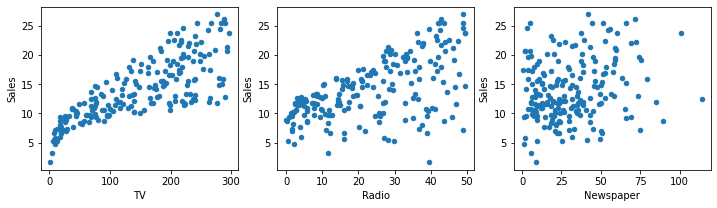

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
ad.plot.scatter('TV', 'Sales', ax = axes[0])
ad.plot.scatter('Radio', 'Sales', ax = axes[1] )
ad.plot.scatter('Newspaper', 'Sales', ax = axes[2] )
plt.show()

#### 공분산 

$$ cov(x,y)=\frac{\sum_i (x_i- \bar x) (y_i - \bar y )}{n-1} $$

#### 상관계수 
- Pearson 상관계수 
    $$ cor(x,y)= \frac{cov(x,y)}{sd(x)sd(y)}$$


In [33]:
ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


- Spearman의 $\rho$
    - 순위에 바탕을 둔 비모수적 방법
    - 직선관계가 아니더라도 완벽한 상관관계가 있으면 1을 갖는다.

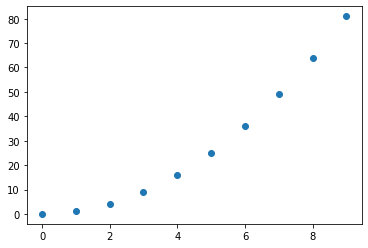

In [53]:
x=np.arange(10)
y=x**2

plt.scatter(x,y)
plt.show()

In [41]:
stats.pearsonr(x,y)

(0.9626907371412556, 8.103391267431583e-06)

In [40]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)

## 6.2 단순회귀분석 
- 하나의 종속변수와 하나의 설명변수 간의 관계를 직선으로 표현하는 방법
- 종속변수
    - 반응변수,내생변수, dependent/response/endogenous variable
    - 예측의 대상이 되는 변수
- 독립변수
    - 설명변수,외생변수, independent/explanatory/exogenous variable)
    - 종속변수를 예측하는데 활용될 변수 

### 6.2.1 상관분석 vs 회귀분석
- 상관분석
    - 두 변수 간의 선형관계의 강도 측정
    - 인과관계 없음
    - False 상관관계 유의
    
- 회귀분석
    - 원인이 되는 변수 (설명변수)에 따른 종속변수의 결과 예측 (의존적 관계) 
    - 둘 이상의 변수들 간의 관계 
    - 상관관계 포함
    - 인과관계는 통계학의 범주를 넘어서서 이론적인 선험적인 고려가 선행되어야 한다. 
    

- Example
    - 경찰관 수와 범죄발생 건수 사이의 양의 상관관계를 관찰했다. 
    - 범죄발생이 늘어서 경찰관 수가 늘었나? 아니면 경찰관 수가 늘어서 범죄발생이 늘었나?? 
    - 마을의 인구가 증가한 것이 범죄발생 수와 경찰관 수 증가에 모두 영향을 준 것이라면 인과관계의 설명이 어렵다. 

<img src='http://drive.google.com/uc?export=view&id=1xCY6m6OHcN-OW6qDEVIiAKFxMsv9YMwd' width=500/><br>

### 6.2.2 단순 선형회귀 모형 
#### Example: Advertisement 
- TV 광고예산과 판매량의 관계를 선형식으로 표현
$$ Sales \approx \beta_0 + \beta_1 \times TV $$

#### 단순 선형회귀 모형
$$ y_i = \beta_0 + \beta_1 x_i + \epsilon_i,~~~ i=1,2,\ldots,n $$

- $\beta_0$: 절편 (모수)
- $\beta_1$: 기울기 (모수)
- $\epsilon_i$: 오차항 (확률변수: 평균 0, 분산 $\sigma^2$)

#### 추정된 회귀식 
$$ \hat y_i = \hat \beta_0 + \hat \beta_1 x_i $$

- $\hat y_i$: $x_i$ 값에 대한  $y_i$의 예측값 

- $\hat \beta_0, \hat \beta_1$: 계수추정치 

      
#### 선형회귀모형의 가정 

- $y$와 $x$는 선형관계이다.
- 오차항은 서로 독립이다. 
- 오차항 분산은 동일하다
- 오차항은  정규분포를 따른다. 

      
### 6.2.3 회귀계수의 추정

- n개의 관측치 쌍이 주어진 상황
$$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n) $$

- 어떤 $\hat y_i = \hat \beta_0 + \hat \beta_1 x$가 좋은 추정치인가?

<img src='http://drive.google.com/uc?export=view&id=1djl6jmwfZM5OHn6MrH3jv_Erz5YYdXhR' width=500 /><br>

#### 최소제곱법(Least Square Estimation; LSE) 
- 잔차(residual)
$$e_i=y_i -\hat y_i$$
    - 잔차를 줄이는 회귀선이 좋음.
- 잔차제곱합(Residual Sum of Square; RSS)
$$RSS=e_1^2 +e_2^2 + \cdots + e_n^2 $$

- 최소제곱법
    - RSS를 최소화 하는 $\hat \beta_0,\hat \beta_1$을 선택 
    
    $$ \hat \beta_1= \frac{\sum_{i=1}^n (x_i-\bar x)(y_i -\bar y)}{\sum_{i=1}^n (x_i -\bar x)^2 }$$
    $$\hat \beta_0=\bar y - \hat \beta_1 \bar x $$

    

In [21]:
model = smf.ols('Sales ~ TV', data = ad).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        23:22:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

     
#### 회귀계수의 해석
- 추정된 회귀식
$$ \hat y = 7.033 + 0.0475 x$$
- $\hat \beta_1$: TV광고 투자가 매 1천달러 증가할 경우 판매량은 47.5 유닛만큼 증가한다.
    
- $\hat \beta_0$: TV광고 투자가 0달러 일때 판매량은  7033 유닛이다(?!)  
    - $\beta_0$의 해석은 주의해야 함. 0이 데이터의 범위 안에 포함되는지 확인. 
     

### 6.2.4 계수 추정값의 정확도 평가
- $\hat \beta_1$의 해석 중 "47.5 유닛"이 얼마나 정확할까? 
    - 다른 표본을 사용한다면? 
    - 1000개의 서로 다른 표본을 사용하여 회귀계수를 계산하였을 때 그 값의 평균과 표준편차는? 
      
- 모회귀선과 최소제곱선 
<img src='http://drive.google.com/uc?export=view&id=1imTLmKdnTwMUFfO_TPZDK9oXgmn1kAox' width=500/><br>

- 최소제곱선의 평균 
 $$E(\hat \beta_0)=\beta_0,~~E(\hat \beta_1)=\beta_1 $$

  - 특정 데이터셋에 대해 계산한 $\hat \beta_0, \hat \beta_1$은  $\beta_0, \beta_1$과 정확히 일치하지 않음 
  - 많은 수의 데이터 셋에 대해 얻은 여러 $\hat \beta_0, \hat \beta_1$을 평균하면 $\beta_0, \beta_1$와 일치 &rarr; **비편향 추정량(Unbiased estimator)**

- 최소제곱선의 표준오차 (standard error)
    - 하나의 추정값 $\hat \beta_0, \hat \beta_1$은 $\beta_0, \beta_1$과 얼마나 다를 것인가? 
    $$SE(\hat \beta_0)^2 = \sigma^2 \left[ \frac 1 n + \frac{\bar x^2 }{ \sum_{i=1}^n (x_i - \bar x)^2 }\right],~~SE(\hat \beta_1)^2 = \frac {\sigma^2 }{\sum_{i=1}^n (x_i - \bar x)^2}  $$
    - $\hat \sigma^2 = RSS/(n-2)$ 사용하여 SE를 추정 

      
      

#### 회귀계수에 대한 95% 신뢰구간
$$\hat \beta_1 \pm 2\cdot SE(\hat \beta_1),~~  \hat \beta_0 \pm 2\cdot SE(\hat \beta_0)$$
     

In [23]:
model.conf_int(alpha=0.05)

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


-  광고를 전혀 하지 않으면 평균 판매량은 [6130, 7940] 사이의 값으로 떨어진다 
- TV광고 투자가 매 1천달러 증가할 경우 판매량은 평균 [42, 53] 사이의 값만큼 증가한다.

&nbsp;

### 6.2.5 회귀계수에 대한 가설검정
- 귀무가설, 대립가설
 $$H_0: \beta_1=0$$
 $$H_1: \beta_1\neq0$$
 
- 검정통계량
$$t=\frac{\hat \beta_1}{ SE(\hat \beta_1)}$$

    - $H_0$가 사실일 때  $t \sim t_{n-2}$ 분포를 따른다.

  
- p-value
    - $H_0$가 사실일 때 어떤 값이 $|t|$와 같거나 큰 경우를 관측할 확률 
    - 실질적인 상관성이 없는데도 우연히 의미있는 상관성이 예측될 확률 
    - p-value가 충분히 작으면 상관성이 있다고 결론 ($H_0$  기각)

- 회귀계수 해석의 주의점
    - 귀무가설 $H_0: \beta_1=0$  기각하여 x와 y의 관계가   유의하다고 하더라도 x와 y 간에 원인-결과 관계가 존재한다고 결론 내릴 수는 없다.
    
    - $H0: \beta_1=0$을 기각하고 통계적 유의성만 검정할 수 있기 때문에 x와 y의 관계가 선형이라고 결론내릴 수 없다. 
    
    - $\hat \beta_0$에 대한 해석은 설명변수 자료의 범위가 0을 포함할 때만 의미가 있다. 
    

### 6.2.6 모델의 정확도 평가
- 모델이 데이터에 얼마나 적합한가? 

#### 결정계수 $R^2$
- 비율로 표현되는 적합도 측도
$$R^2 = \frac{TSS-RSS}{TSS} = 1-\frac{RSS}{TSS} $$
    - $TSS=\sum(y_i-\bar y)^2$: 총 제곱합 (회귀분석 수행 전 $Y$안에 내재된 변동량)
    - $TSS-RSS=\sum(\hat y_i-\bar y)^2$: 회귀를 수행함으로써 설명된 Y의 변동량 
    - $RSS=\sum(y_i-\hat y)^2$: 회귀식에 의해 설명되지 않는 Y의 변동량 

- $0\leq R^2 \leq 1$
- X를 사용하여 설명될 수 있는 Y의 변동 비율(proportion of variability)
    - $R^2 \approx 1$: $Y$의 변동 중 많은 부분이 회귀식에 의해 설명
    - $R^2 \approx 0$: $Y$의 변동 중 대부분이 회귀식에 의해 설명되지 않음 

In [25]:
model.rsquared

0.611875050850071

- sales의 변동 중 61%가 TV에 대한 선형회귀에 의해 설명된다. 
- 단순선형회귀에서는 $R^2$는 피어슨 상관계수의 제곱과 같다.

In [28]:
stats.pearsonr(ad.Sales,ad.TV)[0]**2

0.6118750508500711

### 6.2.7 예측
- 주어진 독립변수에 대한 종속변수의 값을 추정된 회귀식에 의해 예측한다.

$$\hat y= \hat \beta_0 + \hat \beta_1 x^*  $$

In [38]:
pred = model.get_prediction(exog = dict(TV=100))
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,11.786258,0.262897,11.26782,12.304695,5.339251,18.233264


#### 신뢰구간 
- 수많은 도시에 대한 **평균** 판매량을 둘러싼 불확실성을 수량화
- TV광고에 10만달러를 지출한다면 판매량의 평균은 11268개와 12305개 사이일 것으로 95% 확신함


#### 예측구간
- **특정** 도시의 판매량에 대한 불확실성을 수량화
- TV광고에 10만달러를 지출한 도시에서 판매량은 5339개와 18233개 사이일 것으로 95% 확신함  

- 회귀식은 가지고 있는 data 범위 밖에서 예측은 주의!! (Extrapolation 문제)

## 6.3  No Intercept Model
### Example: Cars
- 차의 속도와 급브레이크밟았을 때 멈추기까지 걸린 거리를 50대의 차에 대해 수집하였다. 


In [54]:
cars = pd.read_csv(data_path  + "cars.csv")
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [55]:
model_cars = smf.ols('dist~speed', data = cars).fit()
model_cars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           1.49e-12
Time:                        15:34:18   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 속력이 1만큼 증가했을 때 거리는            3.9324    만큼 증가한다.
- 속력이 0일 때 거리는    -17.5791                   이다?

### No Intercept Model 
- 속도가 0이면 멈추기 까지 걸린 거리도 0인 것이 당연하다.
- $\beta_0=0$으로 고정하고 $\beta_1$만을 모형에서 추정한다.


In [51]:
model_cars = smf.ols('dist~speed+0', data = cars).fit()
model_cars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   dist   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              423.5
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                    9.23e-26
Time:                        00:49:47   Log-Likelihood:                         -209.87
No. Observations:                  50   AIC:                                      421.7
Df Residuals:                      49   BIC:                                      423.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          2.9091      0.141     20.578      0.000       2.625       3.193
==============================================================================
Omnibus:                       14.345   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.573
Skew:                           1.202   Prob(JB):                     0.000415
Kurtosis:                       4.302   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- speed가 1 증가할 때 dist가 2.9091만큼 증가한다. 

